In [1]:
# импортируем библиотеки
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
# генерируем выборку объемом 1000
rv = sts.expon() 
sample = rv.rvs(1000)

# расчитываем теоритеческую плотность вероятности
x = np.linspace(0,15,1000)
pdf = rv.pdf(x)

Text(0,0.5,'$f(x)$')

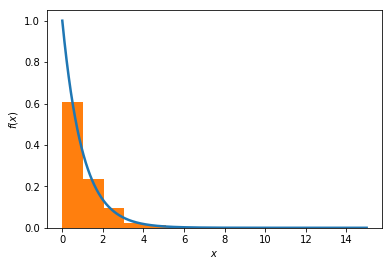

In [3]:
# построим гистограмму выборки и наложим на нее теоретическую 
# оценку плотности вероятности экспоненциального распределения
plt.plot(x, pdf, linewidth = 2.5)
plt.hist(sample, density = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [4]:
#на графике видно, что гистограмма выборки совпадает с теоретической оценкой плотности вероятности

In [5]:
# опишем функцию, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины
# и теоретической оценки плотности вероятности для распределения выборочных средних

def generate_pdf(n): 
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for _ in range(1000):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    # расчитаем теоритеческую плотность вероятности для нормального распределения
    mu = 1 
    sigma = (1./n) ** 0.5 
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, density = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

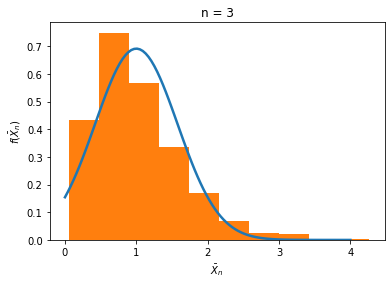

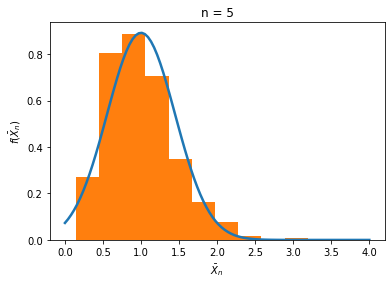

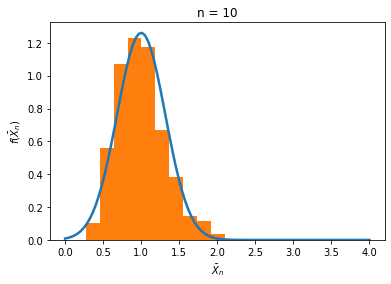

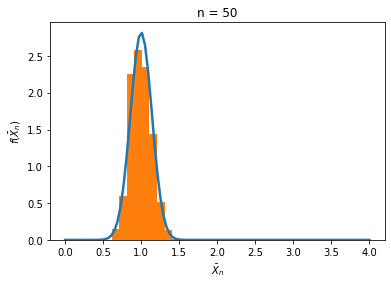

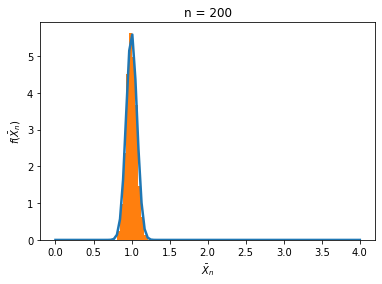

In [10]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [3, 5, 10, 50, 200]:
    generate_pdf(n)

In [14]:
# Графики показывают, что чем больше объем выборки, тем лучше соответствие выборочных средних 
# и приближающего его нормального распределения
